<a href="https://colab.research.google.com/github/yumeean/CS482/blob/main/Homework1_ig62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1
#Ian Gabrielle Gojo Cruz
#CS 482

##1)  A data scientist develops a model of the mortality probability distribution function  
<p align="center">
$p(t) = 3 \times 10^{-9} t^2(100-t)^2, 0 \le t \le 100 ~\text{years}$  
</p>

$p(t)$ is 0.0 outside the above range of t.  

###a. What is the probability that a person will die between 60 and 70.  
  
Given : $p(t) = 3 \;x \;10^{-9}t^{2}(100 - t)^{2}$, for $0 \le t \le 100$ years  

Find  : $P(60 \le t \le 70)$

$\int_{60}^{70}3 \;x \;10^{-9}t^{2}(100 - t)^{2} \;dt$  

In [ ]:
from scipy.integrate import quad

def integrand(t):
  return 3*10**(-9)*t**2*(100 - t)**2

ans, err = quad(integrand, 60, 70)
print(ans)

0.15436000000000002


<font color='blue'>Answer:  $\int_{60}^{70}3 \;x \;10^{-9}t^{2}(100 - t)^{2} \;dt$  = $0.15436$

---



###b. What is the probability that a person will die between 60 and 70, given that was alive at 60.  
  
Find: $P(60 \le t \le 70 | 1 - P(0 \le t \le 60))$  

Finding the probability that the person is alive at age 60 would be:

Probability that the person will die from $ 0 \;to \;60 $  
  
$P(0 \le t \le 60) = \int_{0}^{60}3 \;x \;10^{-9}t^{2}(100 - t)^{2} \;dt$

In [ ]:
ans, err = quad(integrand, 0, 60)
print(ans)

0.6825600000000001


$P(0 \le t \le 60) = 0.68256$  
  
Meaning, the probability that the person is alive at age 60 would be 
   
$ 1 - 0.68256 = 0.31744$

We have the following:  
let &nbsp;$P(B) = P(60 \le t \le 70) = 0.15436$  
&nbsp; &nbsp; &nbsp; $P(A) = 1 - P(0 \le t \le 60) = 0.31744$



In [ ]:
b = 0.15436
a = 0.31744

p = b/a
print(p)

0.48626512096774194


then,  

$P(B|A) = \frac{0.15436}{0.31744} = 0.46265$  
  
<font color='blue'>Answer: $P(60 \le t \le 70 | 1 - P(0 \le t \le 60)) = 0.46265$ 

##2) Three switches connected in parallel operate independently. Each switch remains closed with probability p.

![figure 1](https://pantelis.github.io/cs634/docs/common/assignments/probability-assignment/images/probabilistic-switches.png)  

### a. Find the probability of receiving an input signal at the output.  
  
Given: $P(S_1)=P(S_2)=P(S_3)=p$ (switched is closed)  
  
$ 1 - p $ (switch is open)
  
Let A = $S_i$ is closed  
  
Let B = Receiving an input signal at the output 
   
We know that that $S_1, S_2,$ and $S_3$ are all independent meaning:  
<p align="center">
$P(A_1A_2A_3) = P(A_1)P(A_2)P(A_3)$   
</p

In order for event B to happen, at least 1 of 3 switches should be closed.  
<p align="center">
$B = A_1 \cup A_2 \cup A_3$
</p>
$P(B) = P(A_1 \cup A_2 \cup A_3)$  

$P(B) = 1 - (1-p)^3$  

<font color='blue'>Answer: $P(B) = 3p - 3p^2 + p^3$

### b. Find the probability that switch $S_i$ is open given that an input signal is received at the output.  

Given the information above, we need to find  

$P(\overline{A_1}\;|\;B) = \;?$  

Using Baye's Theorem,  where $P(A\;|\;B) = \frac{P(B|A)\;P(A)}{P(B)}$  then,  


$P(\overline{A_1}\;|\;B) = \frac{P(B|\overline{A_1})\;P(\overline{A_1})}{P(B)}$  

We also know that $P(B|A_1) = 1$, and  $P(B|\overline{A_1}) = P(A_2 \cup A_3) = 2p - p^2$  

We can just fill these values in our equation resulting to

<font color='blue'>Answer: $P(\overline{A_1}|B) = \frac{(2p - p^2)(1 - p)}{3p - 3p^2 + p^3}$

#3) Make yourself familiar with the multinomial distribution

##a) a. Each trial involves throwing a die with 10 faces/sides. All faces are equally probable aka the die is not biased. Calculate the probability of the counts of outcome “2” if we performed $n=1000$ trials.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


k = 10
n = 1000
counter = 0
for i in range(n):
  numbers = np.random.randint(1,11,10)
  #print(numbers)
  for number in numbers:
    if number == 2:
      counter += 1

p = counter/(k * n)

print("The probability of outcome \"2\" after 1000 trials is " + str(p))



The probability of outcome "2" after 1000 trials is 0.0902


We need to make a loop over n times to perform each trial and count the number of "2" occurrences.  

`numbers` is a list of 10 random integers having the same probability.  

We can solve the probability with the formula $P = \frac{X_i}{k \;x\; n}$ where $X_i$ is the number of "2" occurrence and $k$ and $n$ is number of sides and trials respectively.


##b. Simulate n independent trials of the multinoulli (categorical distribution) compliant to the specification of (a). Plot the probability in (a) as a function of n independent trials (n=10-1000). Write your conclusions with respect to the behavior of the estimated probability as $n$ increases.

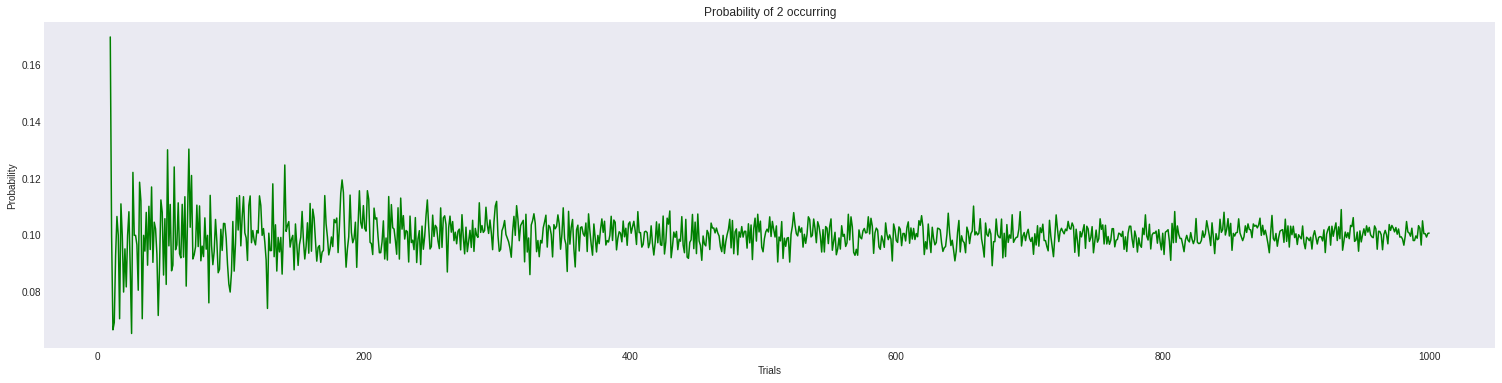

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_list = []
t_list = []

min = 10
max = 1000

for i in range(min, max + 1):
  counter = 0
  for j in range(i):
    numbers = np.random.randint(1,11,10)
    for number in numbers:
      if number == 2:
        counter += 1

  p = counter/(k * i)
  p_list.append(p)
  t_list.append(i)

plt.plot(t_list, p_list, color='green')
plt.xlabel("Trials")
plt.ylabel("Probability")
plt.title("Probability of 2 occurring")
plt.show()


Same concept as (a) however, we need to plot different probabilities depending on the number of trials from $10 \;to \;100$. In order to do this, we need to make a `list` of probability and a `list` of trials and then plot them together. 

#4) Replicate the Figure 1 plots of [this](http://hosting.astro.cornell.edu/~cordes/A6523/GeneratingCorrelatedRandomVariables.pdf) writeup.


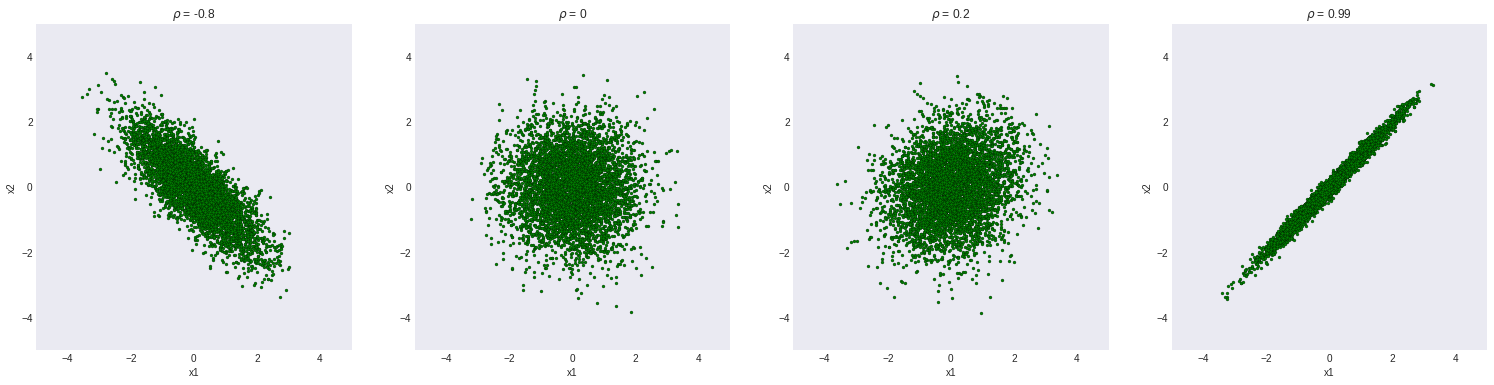

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize']=26,6

random_seed=1000

rho_list = [-0.8, 0, 0.20, 0.99]

mu = np.array([0,0])
 
for i, val in enumerate(rho_list):
    ax = plt.subplot(1, 4, i + 1)
    rho = np.array([[1, val], [val, 1]])
    distr = multivariate_normal(cov = rho, mean = mu, seed = random_seed)
    data = distr.rvs(size = 5000)
     
    ax.plot(data[:,0], data[:,1], 'o', c = 'green', markersize = 3, markeredgewidth = 0.25, markeredgecolor = 'black')
    ax.title.set_text(r'$\rho$ = ' + str(val))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])

plt.show()